In [1]:
from sklearn import *
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import silhouette_score
from random import *
import matplotlib.pyplot as plt #graphes
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Clustering de données

## A) K-Moyennes

### 1. Implémentation de l'algorithme K_Moyennes prenant en entrée la matrice des données et le nombre de clusters que l'on souhaite

In [2]:
def clusterisation(X, nb_clust):
    np.random.shuffle(X)
    centers = X[0:nb_clust, 0:np.size(X,1)]
    #for i in range(0, itera):
    while True:
        dist = metrics.pairwise.euclidean_distances (X,centers)
        Etiq = np.argmin(dist, axis=1)
        new_centers = np.nan_to_num(centers)
        for j in range(nb_clust):
            new_centers[j,:] =  np.mean(X[(Etiq==j)],axis=0)
        centers = np.array(centers)
        new_centers == np.array(new_centers)
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, Etiq

In [3]:
def K_Moyennes(X, n_clusters, rseed=2):
    # 1. On fait un choix aléatoire du nombre de cluster
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. On affecte les labels en se basant sur les centrroides les plus proches
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. On trouve les nouveaux centroides
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. On vérifie la convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

### - On teste la fonction ci-dessus sur les données Iris

In [4]:
iris = datasets.load_iris()
iris_data = iris.data
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
centroids, labels = K_Moyennes(iris_data, 3)
print("Centroids : ", centroids)
print("Labels : ", labels)

Centroids :  [[5.19375    3.63125    1.475      0.271875  ]
 [4.73181818 2.92727273 1.77272727 0.35      ]
 [6.31458333 2.89583333 4.97395833 1.703125  ]]
Labels :  [0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 0 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
c, l = clusterisation(iris_data, 3)
print("Centroids : ", c)
print("Labels : ", l)

Centroids :  [[5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]]
Labels :  [0 1 0 0 0 2 0 0 0 1 1 2 2 0 1 2 1 2 1 1 0 0 1 0 2 2 0 0 1 1 1 0 2 0 1 2 0
 0 2 2 2 0 2 2 0 1 0 0 1 2 2 0 2 1 1 0 2 0 0 0 2 0 1 2 0 0 1 0 2 1 0 0 2 0
 2 2 2 0 0 1 0 2 2 0 0 1 0 2 1 0 2 1 1 2 0 0 0 1 2 0 2 0 0 1 2 0 0 1 2 0 0
 0 1 0 2 2 1 1 1 2 2 2 0 2 1 2 0 0 1 2 1 0 2 2 0 2 1 1 0 2 2 0 0 2 0 2 2 0
 1 1]


### - On compare les résultats avec la fonction Kmeans de sklearn

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_data)
label_pred = kmeans.predict(iris_data)
centers = kmeans.cluster_centers_
print("Centroides : ", centers)
print("Labels : ", label_pred)

Centroides :  [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Labels :  [0 2 0 0 0 1 0 0 0 2 2 1 1 0 2 1 2 1 2 2 0 0 2 0 1 1 0 0 2 2 2 0 1 0 2 1 0
 0 1 1 1 0 1 1 0 2 0 0 2 1 1 0 1 2 2 0 1 0 0 0 1 0 2 1 0 0 2 0 1 2 0 0 1 0
 1 1 1 0 0 2 0 1 1 0 0 2 0 1 2 0 1 2 2 1 0 0 0 2 1 0 1 0 0 2 1 0 0 2 1 0 0
 0 2 0 1 1 2 2 2 1 1 1 0 1 2 1 0 0 2 1 2 0 1 1 0 1 2 2 0 1 1 0 0 1 0 1 1 0
 2 2]


In [8]:
label_pred == l

array([ True, False,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False, False, False,  True, False,  True, False, False,
        True,  True, False, False, False,  True, False, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False,  True, False,  True,  True,  True, False,  True, False,
       False,  True,  True, False,  True, False, False,  True,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True, False,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True,

A vue d'oeil, les résultats ne sont pas identiques

### 2. Expérimentation de l'instabilité due à l'initialisation

On va exécuter la fonction KMeans plusieurs fois pour vérifier cette instabilité.

#### Exécution 1

In [9]:
c, l = clusterisation(iris_data, 3)
print("Centroids : ", c)
print("Labels : ", l)

Centroids :  [[5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]
Labels :  [0 0 0 0 1 0 2 1 1 1 0 1 2 2 0 2 0 2 0 0 0 2 0 2 0 1 2 0 1 0 2 2 2 0 2 1 2
 1 2 0 2 0 2 1 2 2 1 0 2 2 1 1 1 0 0 1 1 2 2 2 1 1 1 1 1 1 1 1 1 0 0 1 2 0
 1 1 0 0 0 1 1 0 0 2 2 1 0 1 1 1 2 1 1 1 1 2 0 0 1 0 1 0 2 0 1 0 2 1 2 1 1
 2 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 2 0 1 1 0 2 2 0 1 1 0 0 1 0 2 1 2 1 2 2 1
 1 0]


#### Exécution 2

In [10]:
c, l = clusterisation(iris_data, 3)
print("Centroids : ", c)
print("Labels : ", l)

Centroids :  [[6.31458333 2.89583333 4.97395833 1.703125  ]
 [4.73181818 2.92727273 1.77272727 0.35      ]
 [5.19375    3.63125    1.475      0.271875  ]]
Labels :  [0 2 2 1 0 2 1 2 0 0 0 0 0 0 0 1 0 0 2 0 0 2 0 0 0 0 1 0 0 0 0 1 0 1 2 0 0
 1 0 0 1 0 1 1 2 0 0 0 2 0 0 0 0 1 0 1 1 0 1 0 0 1 2 0 0 0 2 0 2 1 0 0 1 2
 0 0 2 0 2 2 2 0 0 0 0 0 2 0 0 1 0 0 0 1 0 2 0 0 0 2 0 0 2 2 0 0 0 2 2 2 0
 1 2 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 1 2 2 2 2 0 0 0 0 0
 0 0]


#### Exécution 3

In [11]:
c, l = clusterisation(iris_data, 3)
print("Centroids : ", c)
print("Labels : ", l)

Centroids :  [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]
Labels :  [0 1 2 2 2 2 1 1 1 2 2 0 0 1 0 1 2 0 2 2 0 1 1 1 0 2 2 0 1 2 1 0 1 0 1 0 0
 1 1 1 2 1 2 1 0 0 2 0 2 1 1 0 1 2 2 2 0 1 0 1 1 1 0 2 1 2 1 2 2 1 2 1 0 2
 1 0 0 2 0 2 1 0 1 2 2 1 0 2 2 1 1 1 1 2 0 0 2 0 1 1 2 2 1 1 0 1 2 2 2 1 2
 2 0 2 1 0 2 1 2 0 0 1 0 1 1 2 0 1 2 1 1 1 2 0 0 1 1 1 0 2 1 0 1 2 1 2 1 2
 1 1]


#### Conclusion

on constate qu'à chaque exécution, les centres de cluster changent ainsi que les labels prédits.

### 3.  Ecriture du script qui  utilise l'indice Silhouette pour stabiliser les résultats et Sélection automatique du nombre de groupes(de 2 à 10) soit 10 fois pour chaque groupe (cluster). Le script renvoie à la fin la solution ayant le meilleur score.

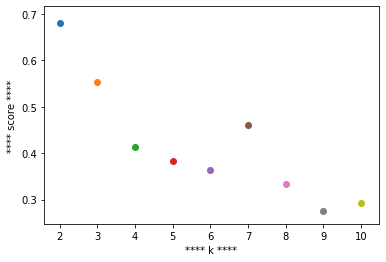

In [13]:
score=0

for k in range(2, 11):
    #nbC = 0
    for i in range(10):
        centres , etiquettes = clusterisation(iris_data,k)
        score = silhouette_score (iris_data, etiquettes, metric='euclidean')
        #print("Pour ",k," clusters, on a : ",score, "de score")
        
    plt.scatter(k,score)
    plt.xlabel('**** k ****')
    plt.ylabel('**** score ****')
#print("On a le meilleur score pour k = ",nbC)

Comme on peut le voir à travers ce nuage de points, la plus grande valeur pour laquelle le score est le plus élevé c'est k = 2

### 4. 

### - Utilisation  de la PCA pour vérifier visuellement la cohérence des groupes obtenus.

In [189]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris.data)
label_pred = kmeans.predict(iris.data)

In [190]:
pca = PCA(n_components=2)
irisPCA = pca.fit(iris.data)
irisPCA =pca.transform(iris.data)
irisPCA.shape

(150, 2)

### - Utilisation  de la LDA pour vérifier visuellement la séparabilité et la compacité de ces groupes

In [191]:
lda_ = LDA(n_components=2)
iris_LDA = lda_.fit_transform(iris.data, iris.target)
#iris_LDA = lda_.transform(iris_data)
iris_LDA.shape

(150, 2)

In [192]:
lda = LinearDiscriminantAnalysis()
irisLDA = lda.fit(iris.data, iris.target) 
irisLDA = lda.transform(iris.data)
irisLDA.shape

(150, 2)

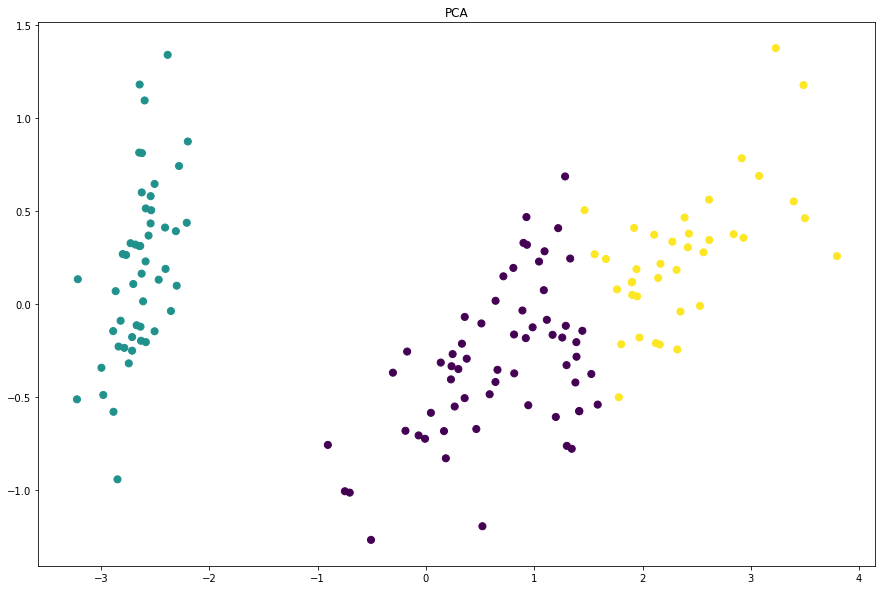

In [193]:
plt.figure(figsize=(15,10))
#titre = i, j
#plt.subplot(n, n, compteur)
plt.title("PCA")
plt.scatter(irisPCA[:,0], irisPCA[:,1],  c=label_pred, s=50, cmap='viridis')

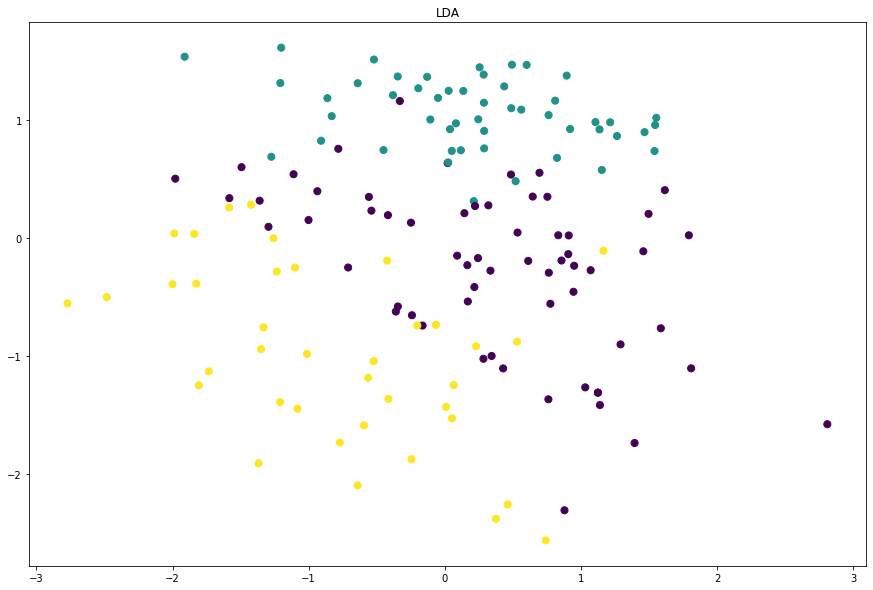

In [194]:
plt.figure(figsize=(15,10))
plt.title("LDA")
plt.scatter(iris_LDA[:,0], iris_LDA[:,1],  c=label_pred, s=50, cmap='viridis')

Text(0.5, 1.0, 'LDA')

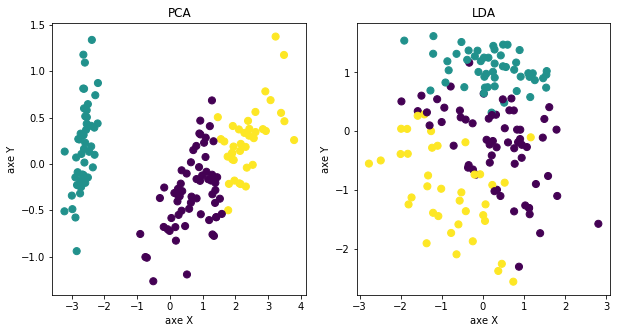

In [195]:
# Visualisation des données à partir de la PCA
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(irisPCA[:,0], irisPCA[:,1], c=label_pred, s=50, cmap='viridis')
plt.xlabel('axe X')
plt.ylabel('axe Y')
plt.title('PCA')

# Visualisation des données à partir de la LDA
ax1 = fig.add_subplot(1,2,2)
ax1.scatter(iris_LDA[:,0], iris_LDA[:,1], c=label_pred, s=50, cmap='viridis')
plt.xlabel('axe X')
plt.ylabel('axe Y')
plt.title('LDA')

La PCA et la LDA sont tous les 2 des techniques de réductions de dimensionalité des variables.
- La différence entre PCA et LDA est que la PCA ne prend pas en compte les étiquettes de sortie : on dit pour cela que c'est une technique de réduction de dimensionnalité non supervisée.
- En revanche, la LDA tente de réduire le nombre de variables tout en conservant les informations qui distinguent les classes de sortie. Elle projette ensuite les points de données vers de nouvelles dimensions de manière à ce que les clusters soient aussi séparés que possible les uns des autres et que les éléments individuels d'un cluster soient aussi proches que possible du centre de gravité du cluster. Parce qu'elle prend en compte les étiquettes de sorties, c'est une technique de réduction de dimensionnalité supervisée.

Aussi les points dans la LDA s'étendent de -3 à 3 sur l'axe des abscisses contre -3 à 4 pour la PCA.
Sur l'axe des ordonnées, on a une dispersion des points de -1 à 1.5 pour la PCA contre -2 à 1 pour la LDA.

## B. Analyse des données : "choix projet"